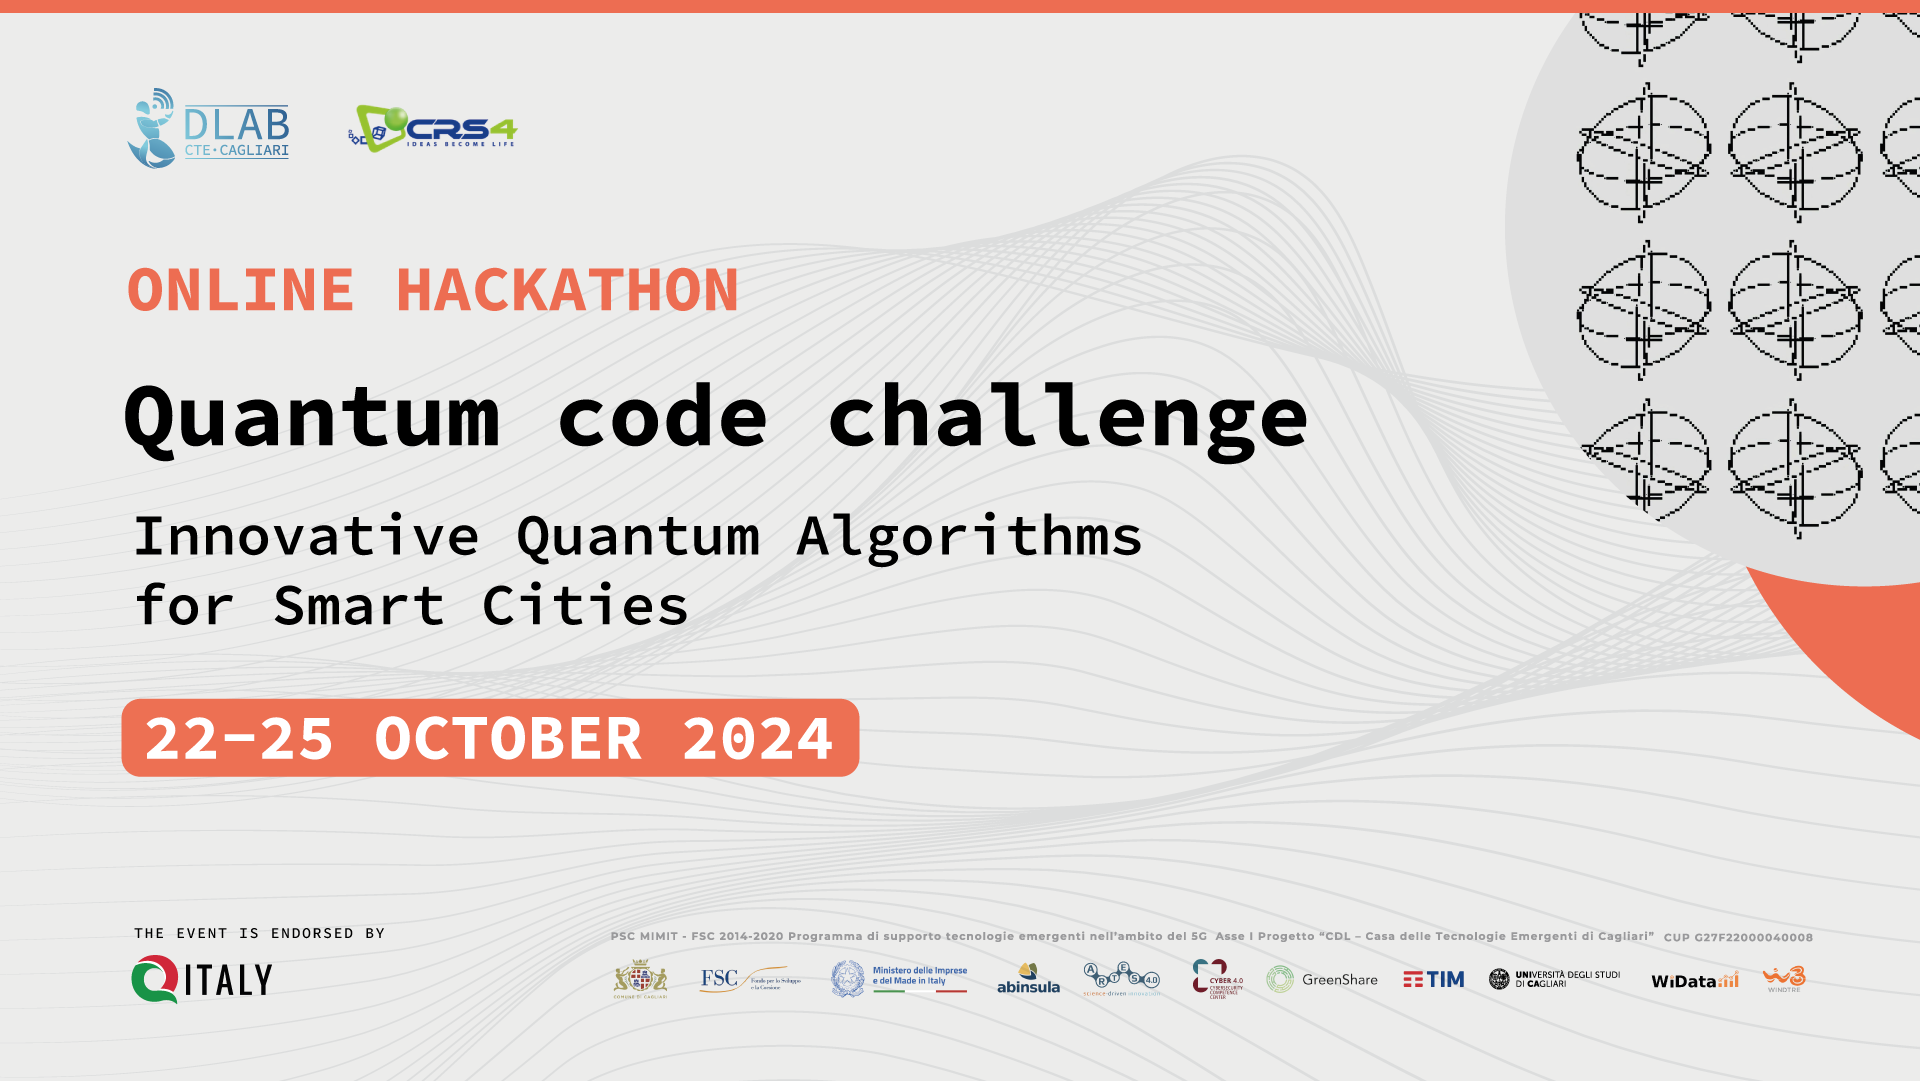

# 9 - Ottimizzazione di una smart grid 

https://leeds-faculty.colorado.edu/glover/511%20-%20QUBO%20Tutorial%20-%20updated%20version%20-%20May%204,%202019.pdf#:~:text=This%20tutorial%20discloses%20the%20basic

## Scenario
Immagina una smart grid con diverse utenze (case, uffici, stazioni di ricarica per veicoli elettrici, ecc.) e generatori di energia (pannelli solari, turbine eoliche, ecc.). L’obiettivo è ottimizzare la distribuzione dell’energia in modo da ridurre lo sbilanciamento tra energia prodotta e energia consumata in un ottica di comunità autonoma e garantire che la domanda di energia sia soddisfatta in modo efficiente. Si assume che le batterie siano tutte uguali

## Definizione del Problema
### Variabili Binarie:
- $ x_i $: rappresenta se l'utenza  $ i $ riceve energia  (1 se sì, 0 se no).
- $ g_j $: rappresenta se il generatore j da energia al sistema 
- $ rc_k $: rappresenta se la batteria k viene ricaricata a un dato momento
- $ rd_k $: rappresenta se la batteria k viene scaricata a un dato momento

### Funzione Obiettivo:
Minimizzare lo sbilanciamento del carico istantaneo: $$ Q = \sum_{i} d_{i} x_i + \sum_{k} rc_{k} d_c -  \sum_{k} rd_{k} d_d - \sum_{j} C_j g_j $$

dove $ d_i $ rappresenta la domanda di energia del nodo ( i ).
### Vincoli:
- Tutte le utenze devono ricevere energia: $ \sum_{i} x_{i} = n_{nodi} \quad \forall i $
- La somma dell’energia distribuita non deve superare la capacità dei generatori: $ \sum_{i} x_{i} \leq \sum C_j g_j\quad \forall j $
- ciascuna batteria può essere in discarica o in ricarica, non nei due stati simultaneamente

In questo esercizio le batterie si considerano cariche a meta' e il coefficiente $d_d$ di energia ceduta in scarico e' uguale a quello di energia assorbita in ricarica $d_c$, ed e' un decimo della capacita della batteria. Non si chiede di tenere traccia del livello di carica della batteria.


## Implementazione con pyqubo
Utilizziamo Array.create per creare un array di variabili binarie per rappresentare la connessione tra nodi e generatori.
La funzione obiettivo H include i costi di trasmissione e la domanda di energia.
I vincoli assicurano che ogni nodo riceva esattamente la quantità di energia richiesta, che le batterie non caricano e scarichino simultaneamente e che la capacità dei generatori non venga superata. 

La formulazione presenta vincoli laschi e per cui non otterrete sempre la stessa soluzione subottimale. Per cui lavoreremo esclusivamente sulla formulazione 

In [1]:
import os
from client_grader import * 
os.environ["TEAM_NAME"] = "pippo"
grader=Crs4GraderClient()
from client_grader import *

In [2]:
from pyqubo import Array, Constraint, Placeholder, solve_qubo

# Definizione delle variabili binarie
n_nodi = 10  # Numero di nodi
n_batterie = 6
n_generatori = 10 # Numero di generatori
x = Array.create('x', shape=(n_nodi), vartype='BINARY')
rd = Array.create('rd', shape=(n_batterie), vartype='BINARY')
rc = Array.create('rc', shape=(n_batterie), vartype='BINARY')
g = Array.create('g', shape=(n_generatori), vartype='BINARY')
# Costi di domanda di energia

d = [3, 2, 4, 1, 5, 10, 2, 5, 9 ,2]
C = [10, 15, 10, 20, 5, 5, 5, 5, 5, 5]  # Capacità dei generatori
dc = 3
dd = 3

lambda_param = Placeholder('elle')
mu_param = Placeholder('mu')

In [3]:
# Funzione obiettivo
# Scrivi qui il tuo codice
H =     

In [4]:
# Vincoli batterie
for k in range(n_batterie):
   # Scrivi qui il tuo codice

In [5]:
# vincolo domanda utenze soddisfatta
# Scrivi qui il tuo codice

In [6]:
# vincolo domanda inferiore alla quantità; generato
for j in range(n_generatori) :
    # Scrivi qui il tuo codice
    
    

In [ ]:
# Compilazione del modello
model = H.compile()

# Sostituzione dei valori dei placeholder
feed_dict = {'elle':100.0 , 'mu':50}
qubo, offset = model.to_qubo(feed_dict=feed_dict)

print(qubo)

In [ ]:
result =solve_qubo(qubo)

result = {k: int(v) for k, v in result.items()}
print(result)

In [ ]:
gg=[0]*n_generatori
for j in range(n_generatori):
    gg[j]=result[f"g[{j}]"]

rcc=[0]*n_batterie
rdd=[0]*n_batterie
for k in range(n_batterie):
    rcc[k]=result[f"rc[{k}]"]
for k in range(n_batterie):
    rdd[k]=result[f"rd[{k}]"]
xx=[0]*n_nodi
for i in range(n_nodi):
    xx[i]=result[f"x[{i}]"]


print("Vincoli batterie")
for k in range (n_batterie):
    if rcc[k] != rdd[k]:
        str="vincolo rispettato"
    else:
        str="vincolo non rispettato"
    print(rcc[k], rdd[k], str) 
  

In [10]:
imbalance= sum(d[i] * xx[i] for i in range(n_nodi)) + sum(rcc[k] * dc for k in range(n_batterie)) - sum(rdd[k] * dd for k in range(n_batterie)) -sum(gg[j] * C[j] for j in range(n_generatori))

In [ ]:
print(imbalance)

## Q9.1-Q9.2-Q9.3

Sono tutti i vincoli della batteria rispettati? Manda in run 10 volte e osserva se sono sempre rispettati.

**Fornisci al grader in sol91 il valore 1 se tutti i vincoli della batteria sono sempre rispettati o 0 se non lo sono.**

**Fornisci al grader in sol92 il coefficiente del termine ('rd[0]', 'rc[0]').**

**Fornisci al grader in sol93 il coefficiente del termine ('x[3]', 'x[3]')**

In [12]:
sol91=[ ]

In [13]:
sol92=[ qubo[("rd[0]","rc[0]")]]

In [14]:
sol93 =[ qubo[('x[3]', 'x[3]')]]

In [17]:
grader.check_submission(sol91, '9.1')
result1 = grader.submit_exercise(sol91, '9.1')

In [ ]:
#print(result1)
# Risoluzione del problema QUBO
import neal
bqm=model.to_bqm(feed_dict=feed_dict)
sampler = neal.SimulatedAnnealingSampler()
    
    # Parametri per il simulated annealing
anneal_params = {
        'num_reads': 2000,
        'num_sweeps': 2000,
        'beta_range': [0.1, 50.0],
        'beta_schedule_type': 'geometric'
}
    
# Esegui il sampling
response = sampler.sample(bqm, **anneal_params)
    
# Ottieni la soluzione migliore
best_solution = response.first.sample
best_energy = response.first.energy



print(best_solution)
print(best_energy)


sorted_sol= {k: v for k, v in sorted(best_solution.items())}
my_list = list(sorted_sol.values())
print(my_list)



In [19]:
imbalance= sum(d[i] * xx[i] for i in range(n_nodi)) + sum(rcc[k] * dc for k in range(n_batterie)) - sum(rdd[k] * dd for k in range(n_batterie)) -sum(gg[j] * C[j] for j in range(n_generatori))

In [20]:
grader.check_submission(sol93, '9.3')
result1 = grader.submit_exercise(sol93, '9.3')

Problema bonus: aggiungi vincoli al qubo per avere energia minima minore di 13316.0?